README
=======

SocialFX Data

This page hosts the data for SocialFX, a project to crowdsource a vocabulary of descriptors for audio effects. It integrates prior data collections for equalization (SocialEQ - http://socialeq.org/data/) and reverberation (SocialReverb - http://music.cs.northwestern.edu/data/socialreverb/). It also contains data for dynamic range compression. To date, the collective data set contains 4297 words drawn from 1233 unique users across three effects (equalization, reverberation, compression).

The following code reads in data/raw/user_concepts.csv, data/raw/reverb_contributions.csv, and data/raw/comp_contributions.csv, which are the equalization, reverberation, and compression data sets, respectively, and recreates Figure 3 in the paper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from collections import Counter
import csv
from operator import itemgetter
import matplotlib

%matplotlib inline
plt.style.use('default')
font = {'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)


In [2]:
# Read in csv files
file1 = file('data/raw/eq_contributions.csv')
file2 = file('data/raw/reverb_contributions.csv')
file3 = file('data/raw/comp_contributions.csv')
eq_reader = csv.reader(file1)
rev_reader = csv.DictReader(file2)
comp_reader = csv.DictReader(file3)

# Find descriptors in common
# EQ words
eq_desc = [row[0] for row in eq_reader]

# Reverb Words
reverb_rawwords = []
reverb_agreed = []
reverb_desc = []
for row in rev_reader:
    reverb_rawwords.append(row["rawwords"])
    reverb_agreed.append(row["agreed"])

for i in range(len(reverb_rawwords)):
    rawwords = reverb_rawwords[i].split(',')
    for string in rawwords:
        if string != "" and string != "none of the above":
            reverb_desc.append(string)
for i in range(len(reverb_agreed)):
    agreed = reverb_agreed[i].split(',')
    for string in agreed:
        if string != "" and string != "none of the above":
            reverb_desc.append(string)

# Compression Words
comp_rawwords = []
comp_agreed = []
compuserid = []
comp_desc = []
for row in comp_reader:
    comp_rawwords.append(row["rawwords"])
    comp_agreed.append(row["agreed"])
    compuserid.append(row["userid"])

for i in range(len(comp_rawwords)):
    rawwords = comp_rawwords[i].split(',')
    for string in rawwords:
        if string != "" and string != "none of the above":
            comp_desc.append(string)
for i in range(len(comp_agreed)):
    agreed = comp_agreed[i].split(',')
    for string in agreed:
        if string != "" and string != "none of the above":
            comp_desc.append(string)

eq_total = len(eq_desc)
rev_total = len(reverb_desc)
comp_total = len(comp_desc)
eq_count = dict(Counter(eq_desc))
rev_count = dict(Counter(reverb_desc))
comp_count = dict(Counter(comp_desc))


In [5]:
for i in np.unique(reverb_desc):
    print i

	thundering 
 appetizing
 audible
 bass
 bien
 clear
 concert effect
 cool
 deep 
 delicate
 eerie
 enchanting
 encompassing
 filtering
 harmony
 heart-vibrant
 hype-music
 impreciso
 large
 lovely
 masterpiece
 muy 
 muy bien 
 orchestra
 pleasant
 puedo sentir claramente la differnce entre estos differnce
 repetitive
 rolling
 ruido
 ruido 
 smart
 smooth
 soft
 strong
 sweet
 thickens - sound
 tonal
 twangy
 warm
 wonderful pleasant
 wonderful- pleasant 
 yummy
"smooth"
"warm"
-echo-howling
-external
-like
-little-stronger
-nice
-sad
1960s-era
3d-like
3d-surround
3dimmensional
50-percent-wet
70s
a
a-bazz
a-echo-howling
a-jazz
a-nice
a-punto-de-pelear
a-sad
abierto
above
abrasive
abrassive
abravise
abrupt
abyss
accompanying
accordian
accoustic
accoustics
accqureat
accustic
aching
acid jack
acolchonado
acoustic
acoustic- environment 
acoustical
acousticla
acoustics
across-room
action
action-invoking
active
acute
added
added-to
adding
addition
additional
additive
adds-echo
adds-value
a

In [ ]:
# Find Words unique to EQ
eq_unique = []
for desc in eq_desc:
    if desc not in reverb_desc and desc not in comp_desc:
        eq_unique.append(desc)
eq_unique = dict(Counter(eq_unique))
eq_unique = sorted(zip(eq_unique.keys(), eq_unique.values()), key=itemgetter(1), reverse = True)
# print eq_unique
     
    
# Find Words unique to Reverb
rev_unique = []
for desc in reverb_desc:
    if desc not in eq_desc and desc not in comp_desc:
        rev_unique.append(desc)
rev_unique = dict(Counter(rev_unique))
rev_unique = sorted(zip(rev_unique.keys(), rev_unique.values()), key=itemgetter(1), reverse = True)
# print rev_unique


# Find Words unique to Compression
comp_unique = []
for desc in comp_desc:
    if desc not in eq_desc and desc not in reverb_desc:
        comp_unique.append(desc)
comp_unique = dict(Counter(comp_unique))
comp_unique = sorted(zip(comp_unique.keys(), comp_unique.values()), key=itemgetter(1), reverse = True)
# print comp_unique


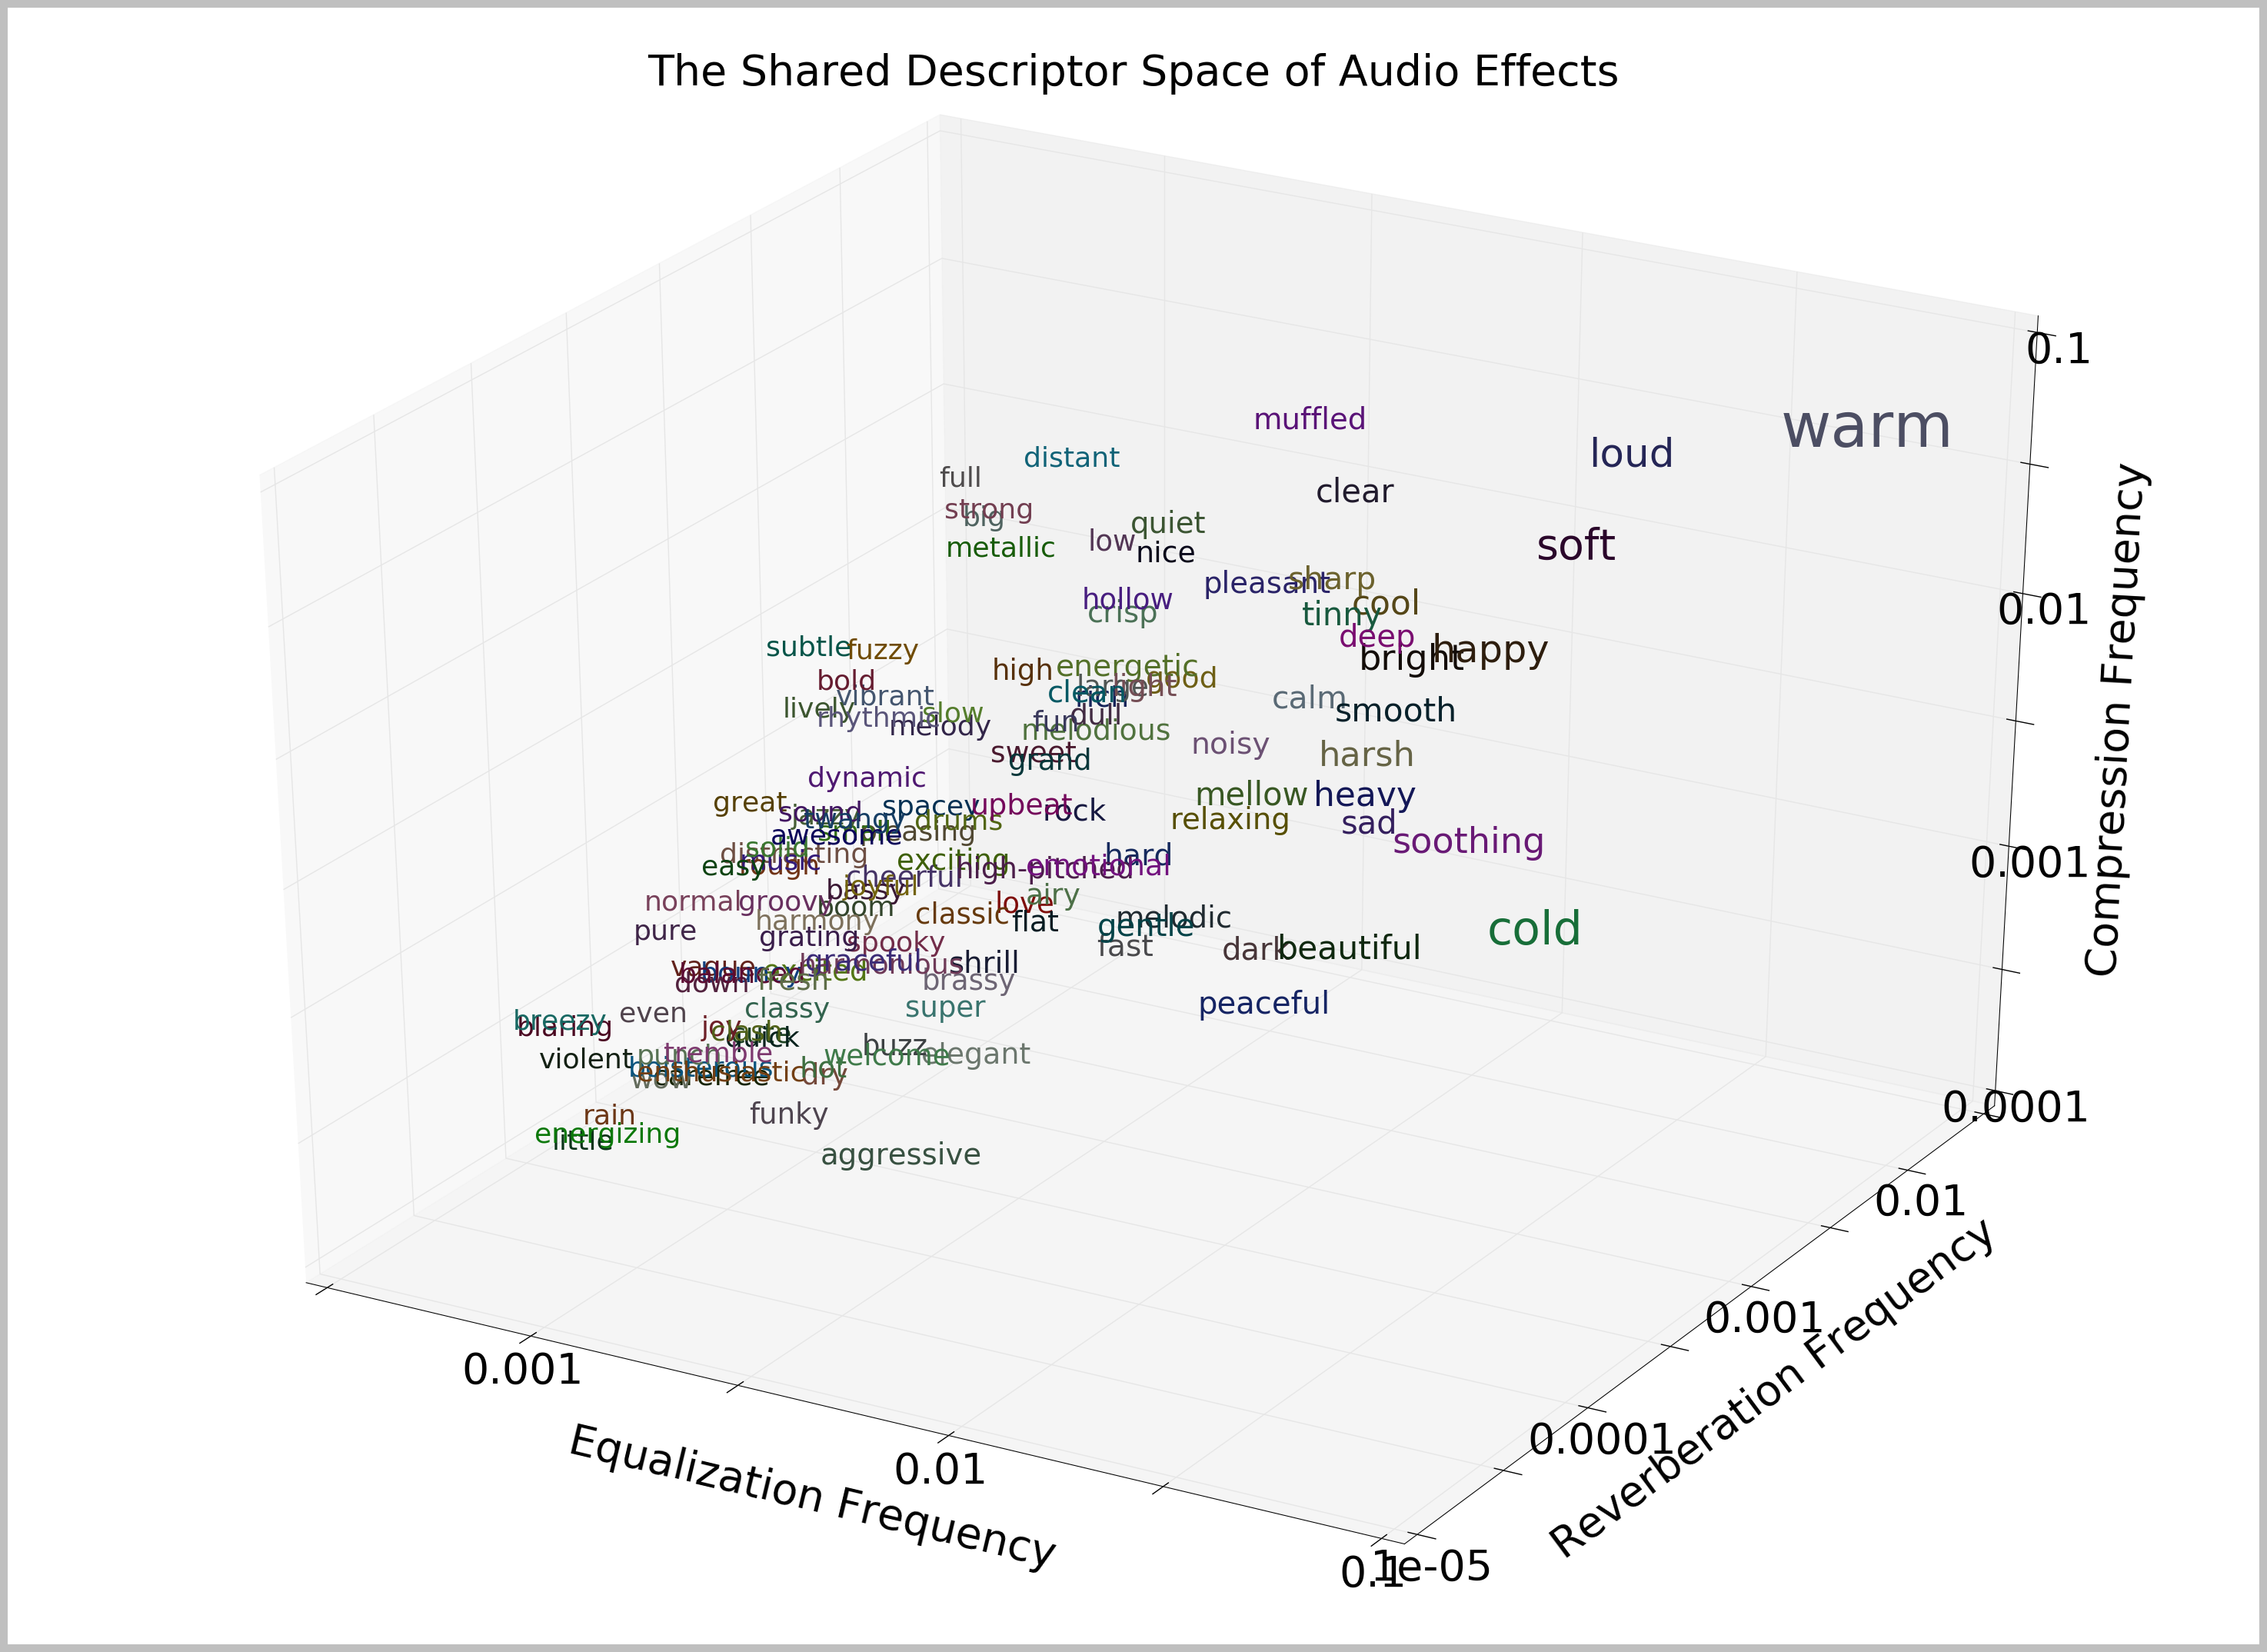

In [1]:
# Pairwise Comparisons between effects
eq_rev = list(set(eq_desc).intersection(reverb_desc))
eq_comp = list(set(eq_desc).intersection(comp_desc))
rev_comp = list(set(reverb_desc).intersection(comp_desc))
er_freq = []
ec_freq = []
rc_freq = []
for desc in eq_rev:
    er_freq.append((desc,float(eq_count[desc])/float(eq_total), float(rev_count[desc])/float(rev_total)))
for desc in eq_comp:
    ec_freq.append((desc,float(eq_count[desc])/float(eq_total), float(comp_count[desc])/float(comp_total)))
for desc in rev_comp:
    rc_freq.append((desc,float(rev_count[desc])/float(rev_total), float(comp_count[desc])/float(comp_total)))
    
# Plotting the descriptors shared by all three effects
shared_desc = list(set(eq_desc).intersection(reverb_desc).intersection(comp_desc))
shared_count = dict()
shared_freq = []
for desc in shared_desc:
    shared_count[desc] = str(desc) + " {EQ Count: " + str(eq_count[desc]) + ", Reverb Count: " + str(rev_count[desc]) + ", Compression Count: " + str(comp_count[desc]) + "}"
    shared_freq.append((desc,float(eq_count[desc])/float(eq_total), float(rev_count[desc])/float(rev_total), float(comp_count[desc])/float(comp_total)))
    
    
enablelog = True
fig = plt.figure(figsize=(30,22))
ax = fig.add_subplot(111, projection='3d')
xs = zip(*shared_freq)[1]
ys = zip(*shared_freq)[2]
zs = zip(*shared_freq)[3]
labels = zip(*shared_freq)[0]
if enablelog: 
    xs = np.log10(xs)
    ys = np.log10(ys)
    zs = np.log10(zs)
ax.scatter(xs, ys, zs, marker=None)

shared_freq_dict = {}
for d in shared_freq:
    shared_freq_dict[d[0]] = d[1]
    
max_freq = np.max([np.sum(d[1]) for d in shared_freq])

for x,y,z,i in zip(xs,ys,zs,labels):
    color = (np.random.rand()/2, np.random.rand()/2, np.random.rand()/2)
    fsize = 32*(np.sum(shared_freq_dict[i])/max_freq + .8)
    ax.text(x+(np.random.rand()-.5)/10,y+(np.random.rand()-.5)/10,z+ (np.random.rand()-.5)/10,i, size=fsize, color=color)


if enablelog:
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()
    zticks = ax.get_zticks()
    xlabels = [np.power(10, x) if x % 1 == 0 else '' for x in xticks]
    ylabels = [np.power(10, x) if x % 1 == 0 else '' for x in yticks]
    zlabels = [np.power(10, x) if x % 1 == 0 else '' for x in zticks]

    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)
    ax.set_zticklabels(zlabels)
    
ax.set_xlabel('\nEqualization Frequency', linespacing=3.2)
ax.set_ylabel('\nReverberation Frequency', linespacing=3.2)
ax.set_zlabel('\nCompression Frequency',linespacing=3.2)

plt.tight_layout()
plt.title('The Shared Descriptor Space of Audio Effects\n')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.zaxis.label] + ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    item.set_fontsize(40)

plt.show()